<h5> Importing Libraries </h5>

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

<h5> Loading Data </h5>

In [2]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.79650,144.99650,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.79950,144.99740,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.79960,144.99890,Northern Metropolitan,4019.0


In [3]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [4]:
df["Date"] = pd.to_datetime(df["Date"],dayfirst=True)

In [5]:
len(df["Date"].unique())/4

19.5

In [6]:
var = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").std()
count = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").count()
mean = df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

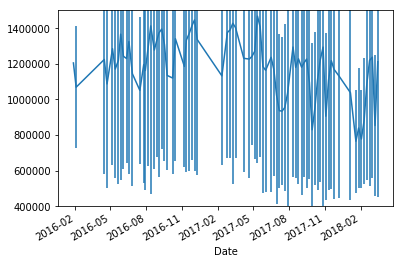

In [7]:
mean["Price"].plot(yerr=var["Price"],ylim=(400000,1500000))

In [8]:
means = df[(df["Type"]=="h") & (df["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").mean()
errors = df[(df["Type"]=="h") & (df["Distance"]<13)].sort_values("Date", ascending=False).groupby("Date").std()

In [9]:
means.columns

Index(['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount'],
      dtype='object')

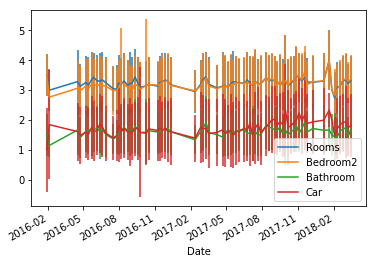

In [10]:
means.drop(["Price",
            "Postcode",
            
           "Longtitude","Lattitude",
           "Distance","BuildingArea", "Propertycount","Landsize","YearBuilt"],axis=1).plot(yerr=errors)

In [11]:
df[df["Type"]=="h"].sort_values("Date", ascending=False).groupby("Date").mean()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
Date,,,,,,,,,,,,,
2016-01-28,3.500000,1.205000e+06,10.100000,3126.500000,3.500000,1.500000,1.000000,649.000000,198.000000,1910.000000,-37.829800,145.087850,4361.000000
2016-02-04,2.958333,1.068888e+06,10.245833,3091.083333,2.842105,1.368421,1.842105,484.947368,126.333333,1963.076923,-37.834721,144.997153,5622.791667
2016-04-16,3.271552,1.224499e+06,8.964655,3091.806034,3.089947,1.645503,1.645503,481.984127,154.068376,1942.500000,-37.803719,144.989346,7363.405172
2016-04-23,3.181818,1.087059e+06,8.721818,3078.445455,3.034483,1.459770,1.528736,908.218391,145.666667,1941.431373,-37.784748,144.975782,7364.154545
2016-05-07,3.279152,1.285205e+06,8.995760,3099.922261,3.164502,1.627706,1.670996,553.207792,166.137931,1945.369427,-37.816396,144.997093,7151.759717
2016-05-14,3.191176,1.171023e+06,8.664216,3093.058824,3.089286,1.648810,1.577381,460.934524,174.868132,1948.295238,-37.804652,144.992144,7352.269608
2016-05-22,3.330144,1.218111e+06,9.051675,3093.019139,3.165680,1.639053,1.751479,505.349112,175.427184,1948.227273,-37.804988,144.984088,6654.267943
2016-05-28,3.452055,1.366617e+06,9.108219,3102.407534,3.220339,1.665254,1.656780,544.563559,178.414286,1948.051613,-37.807166,144.998750,7195.623288
2016-06-04,3.356164,1.242345e+06,9.271233,3096.415525,3.220339,1.734463,1.700565,513.435028,182.311927,1947.388889,-37.816580,144.993675,6640.922374


In [12]:
pd.set_eng_float_format(accuracy=1, use_eng_prefix=True)
df[(df["Type"]=="h") & 
   (df["Distance"]<14) &
    (df["Distance"]>13.7) 
         ].sort_values("Date", ascending=False).dropna().groupby(["Suburb","SellerG"]).mean()

Rooms   Price  Distance  Postcode  Bedroom2  \
Suburb            SellerG                                                      
Albion            Barry            2.3  735.0k      13.9      3.0k       2.3   
                  Bells            3.0  782.0k      13.9      3.0k       3.3   
                  Sweeney          3.0  596.5k      13.9      3.0k       3.0   
                  hockingstuart    3.0  730.0k      13.9      3.0k       3.0   
Altona            Barlow           3.0    1.1M      13.8      3.0k       3.0   
                  Compton          2.0  535.6k      13.8      3.0k       2.0   
                  Greg             3.8    1.1M      13.8      3.0k       3.8   
                  hockingstuart    3.0  928.8k      13.8      3.0k       3.0   
Bentleigh East    Beller           3.0  900.0k      13.9      3.2k       3.0   
                  Buxton           3.2    1.2M      13.9      3.2k       3.2   
                  C21              3.3  907.7k      13.9      3.2k       3.3   
                  First            4.0    1.0M      13.9      3.2k       3.0   
                  Gary             4.0    1.4M      13.9      3.2k       4.0   
                  Hodges           4.2    1.3M      13.9      3.2k       4.0   
                  Jellis           3.4    1.3M      13.8      3.2k       3.4   
                  Marshall         4.0    1.4M      13.9      3.2k       4.0   
                  Nick             3.0    1.0M      13.9      3.2k       3.0   
                  RT               4.0    1.2M      13.9      3.2k       4.0   
                  Ray              3.0  896.7k      13.9      3.2k       3.0   
                  Woodards         3.2    1.1M      13.9      3.2k       3.2   
                  hockingstuart    3.7    1.4M      13.9      3.2k       3.7   
Doncaster         Barry            3.6    1.4M      13.9      3.1k       3.6   
                  Fletchers        3.0    1.2M      13.9      3.1k       3.0   
                  Jellis           3.9    1.5M      13.9      3.1k       3.9   
                  Philip           3.5    1.4M      13.9      3.1k       3.5   
                  RW               4.0    1.4M      13.9      3.1k       4.0   
                  Ray              3.4    1.2M      13.9      3.1k       3.3   
                  Vic              3.0    1.1M      13.9      3.1k       3.0   
                  hockingstuart    3.5    1.5M      13.9      3.1k       3.0   
Hampton           Buxton           3.5    2.6M      13.8      3.2k       3.5   
                  Charlton         3.0    1.6M      13.8      3.2k       3.0   
                  Follett          4.0    1.8M      13.8      3.2k       4.0   
                  Hodges           4.0    2.6M      13.8      3.2k       4.0   
                  Marshall         4.0    2.7M      13.8      3.2k       4.0   
                  Nick             3.0    1.4M      13.8      3.2k       3.0   
                  hockingstuart    4.0    2.0M      13.8      3.2k       4.0   
Hampton East      Buxton           3.8    1.4M      13.8      3.2k       3.8   
                  Hodges           3.0  990.0k      13.8      3.2k       3.0   
Templestowe Lower Barry            3.8    1.2M      13.8      3.1k       3.8   
                  Jellis           3.6    1.3M      13.8      3.1k       3.6   
                  Mason            4.0  790.0k      13.8      3.1k       4.0   
                  Philip           3.3    1.0M      13.8      3.1k       3.3   
                  RT               3.0  650.0k      13.8      3.1k       3.0   
                  Zahn             4.0    1.2M      13.8      3.1k       4.0   
                  hockingstuart    4.5  875.0k      13.8      3.1k       4.5   
Viewbank          Barry            3.0  770.0k      13.8      3.1k       3.0   
                  Buckingham       3.0  880.0k      13.8      3.1k       3.0   
                  Darren           4.0    1.0M      13.8      3.1k       4.0   
                  Fletchers      

C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


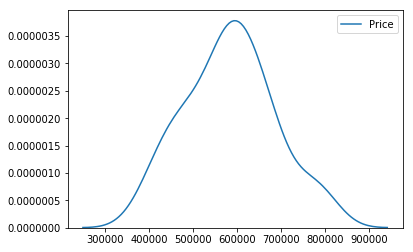

In [13]:
sns.kdeplot(df[(df["Suburb"]=="Northcote")
         & (df["Type"]=="u")
         & (df["Rooms"] == 2)]["Price"])

C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\Users\HI\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


(0, 2000000, 0.0, 2.025885815743751e-06)

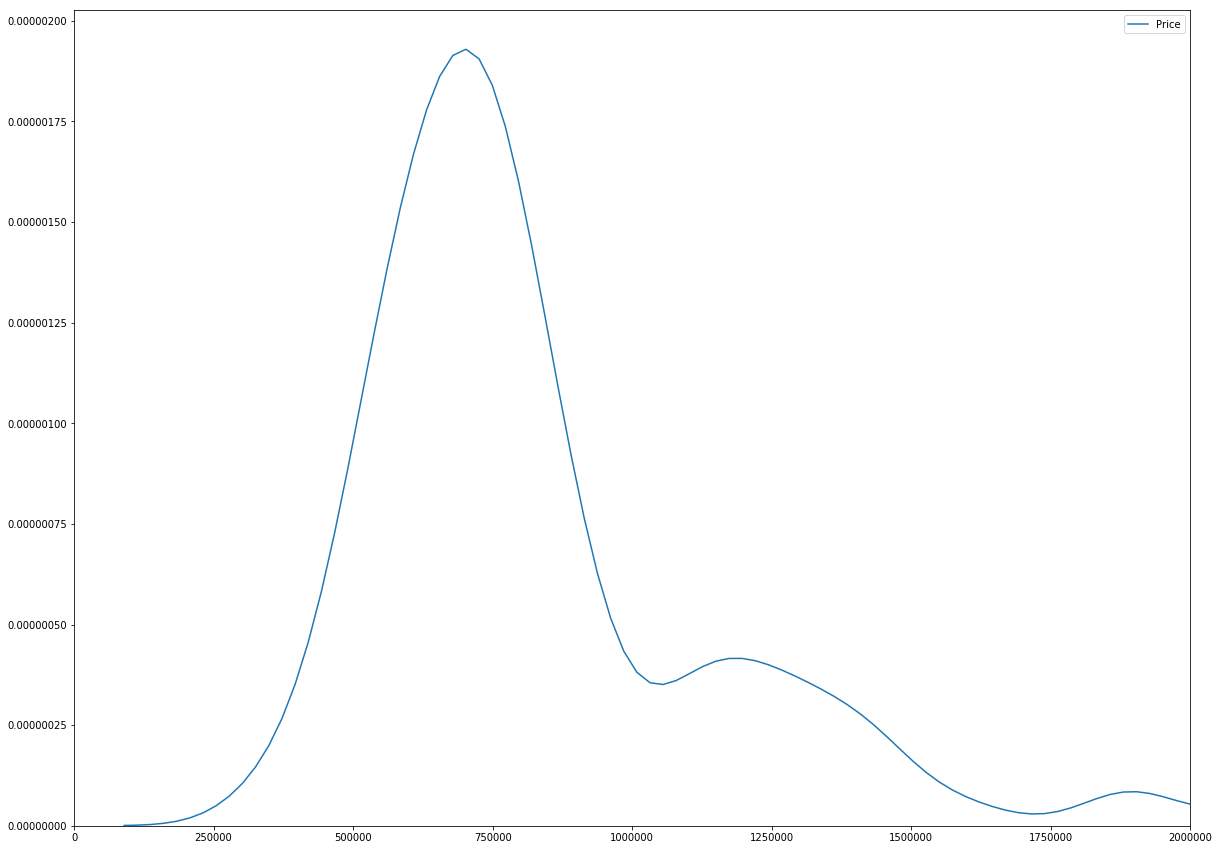

In [14]:
plt.figure(figsize=(20,15))
my_axis = sns.kdeplot(df["Price"][((df["Type"]=="u") &
                                (df["Distance"]>8) &
                                (df["Distance"]<10) &
                                (df["Rooms"] > 2)#&
                               )])
my_axis.axis(xmin=0, xmax=2000000)

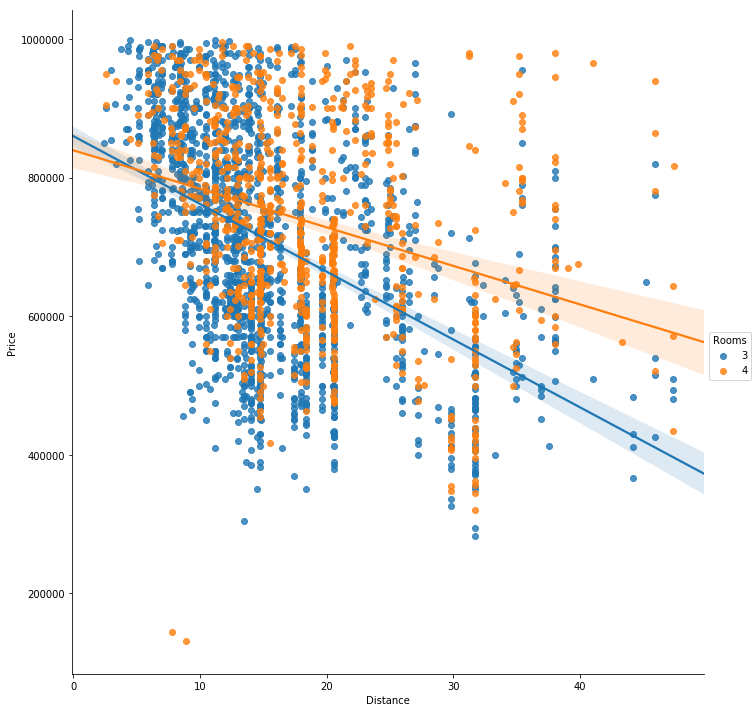

In [15]:
sns.lmplot("Distance","Price",df[(df["Rooms"]<=4) & 
                                 (df["Rooms"]> 2) & 
                                 (df["Type"]=="h") &
                                 (df["Price"]< 1000000)
                                       ].dropna(),hue="Rooms", size=10)

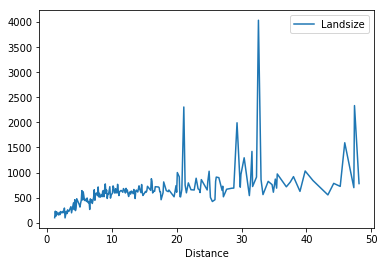

In [16]:
df[(df["Rooms"]>2) & (df["Type"] == "h")& (df["Landsize"] <5000)][["Landsize","Distance"]].dropna().groupby("Distance").mean().plot()

In [17]:
df.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

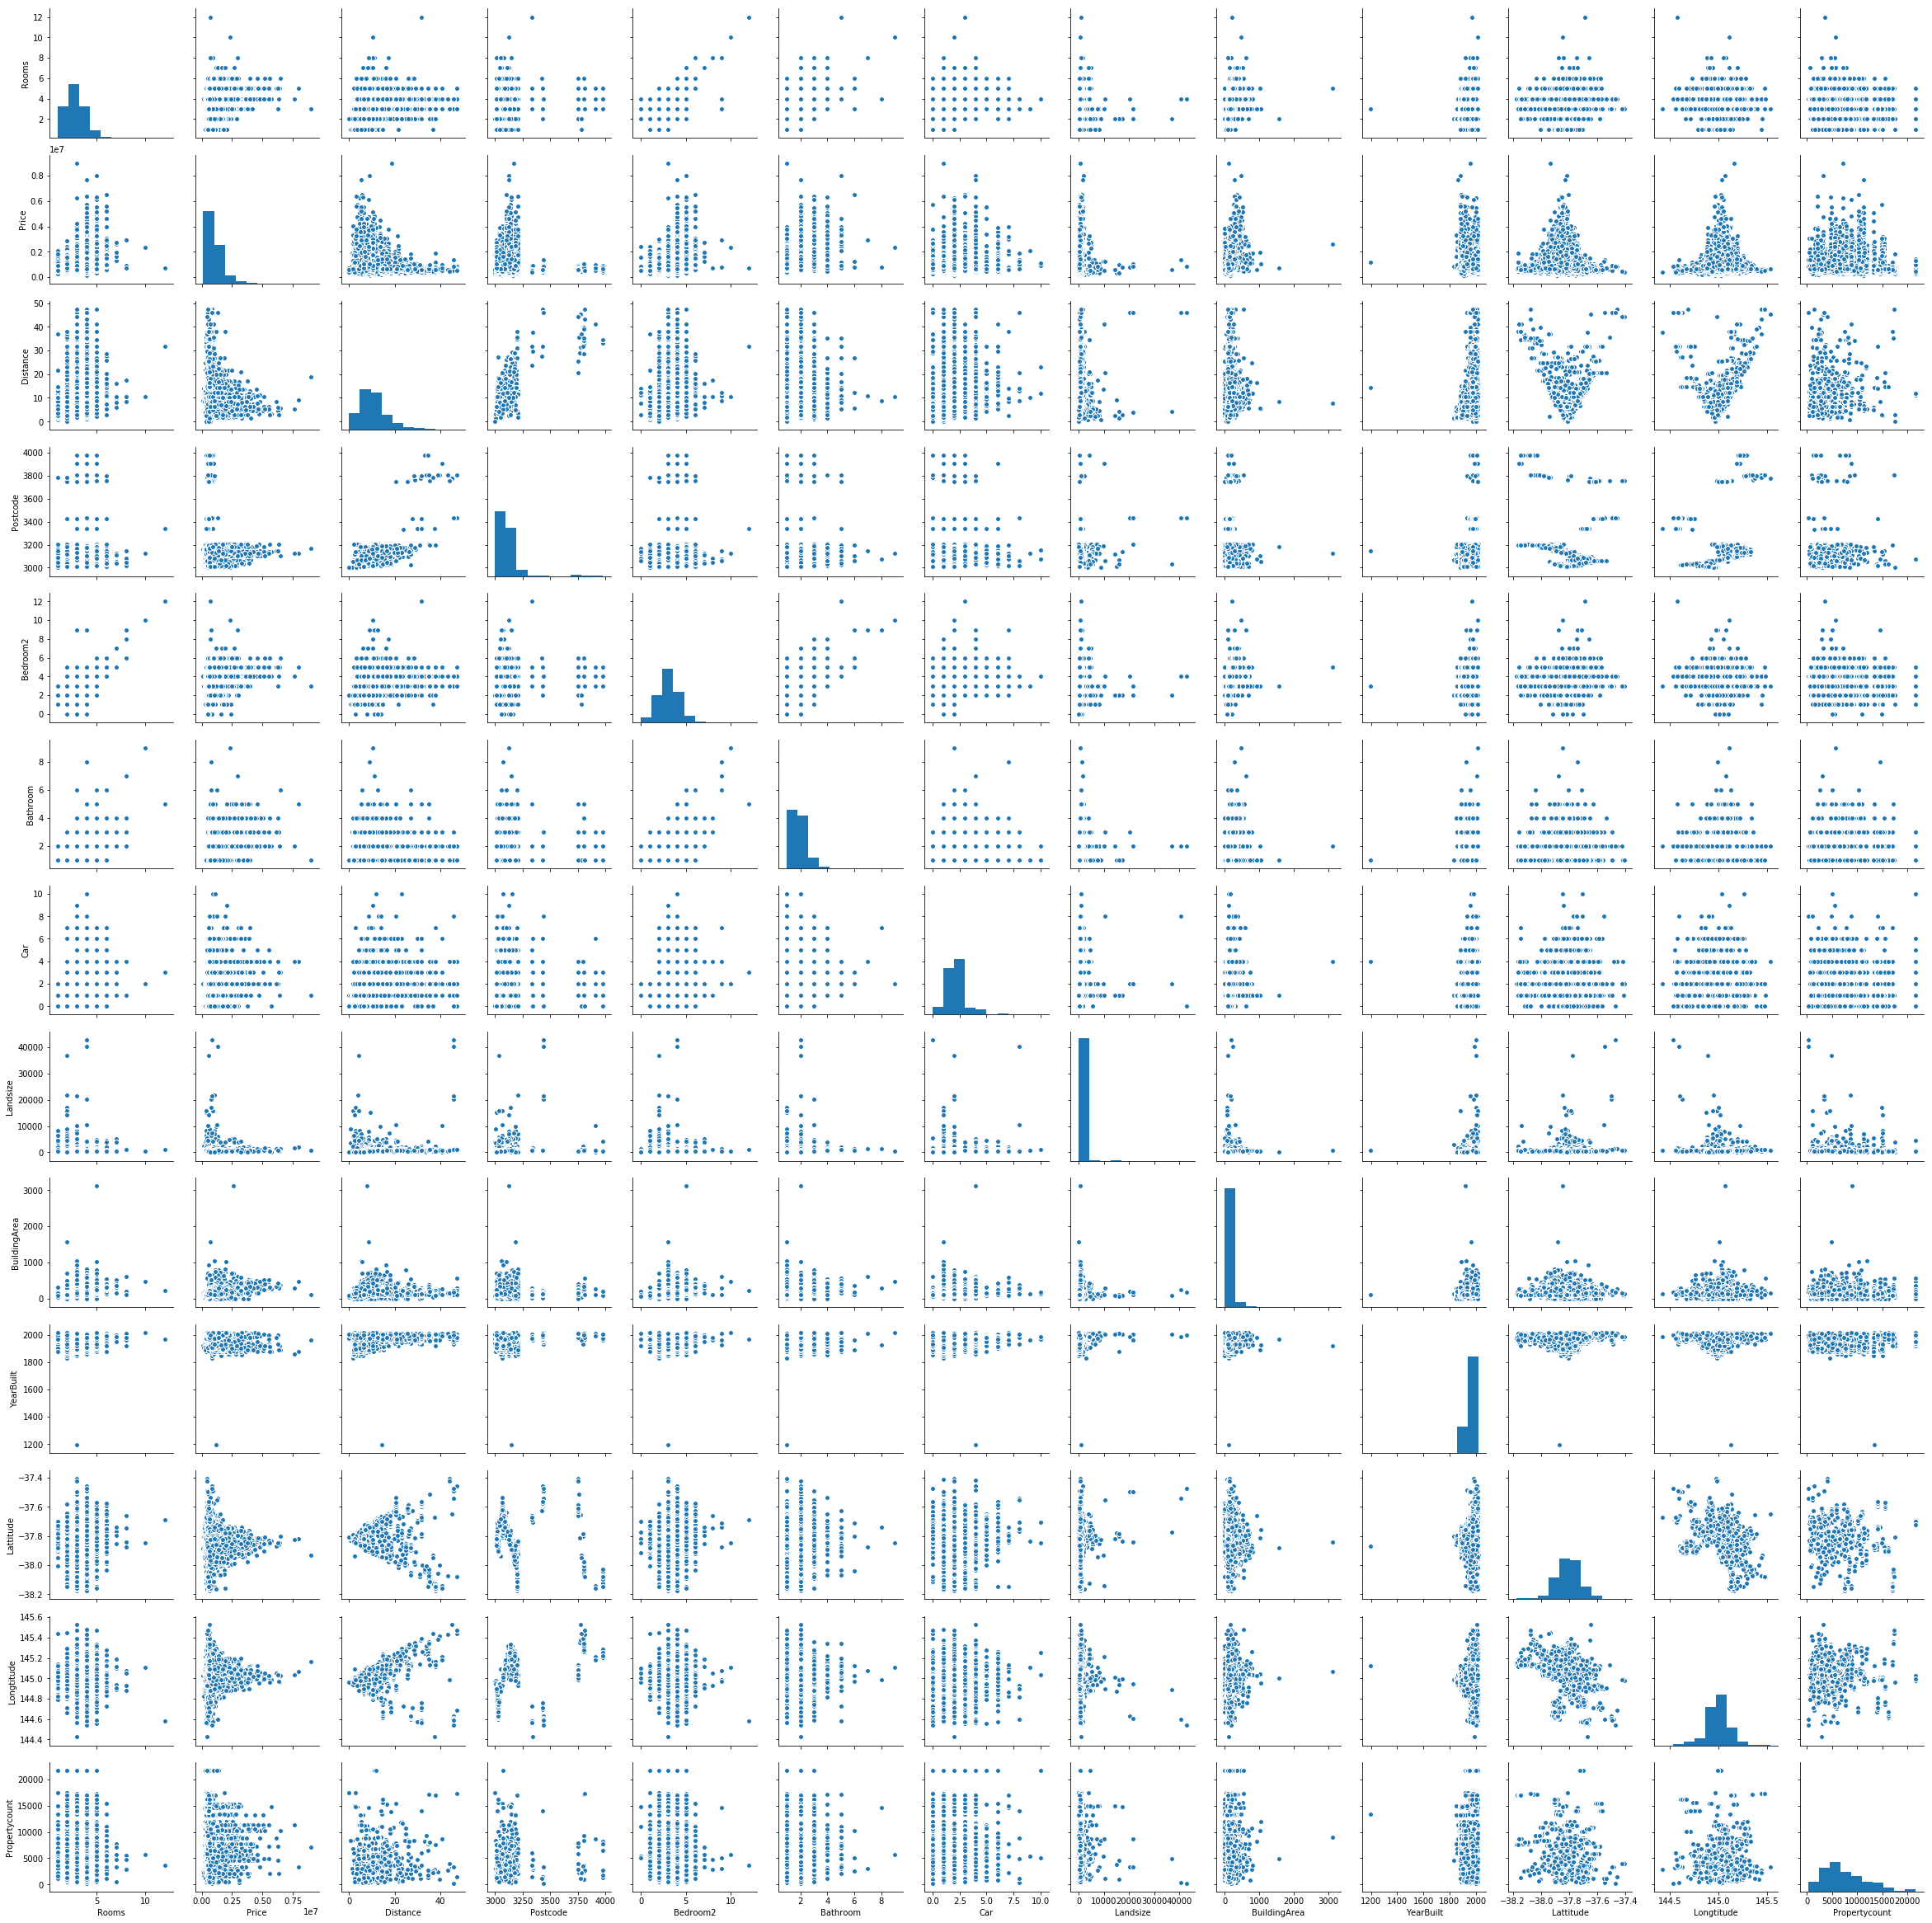

In [18]:
sns.pairplot(df.dropna())

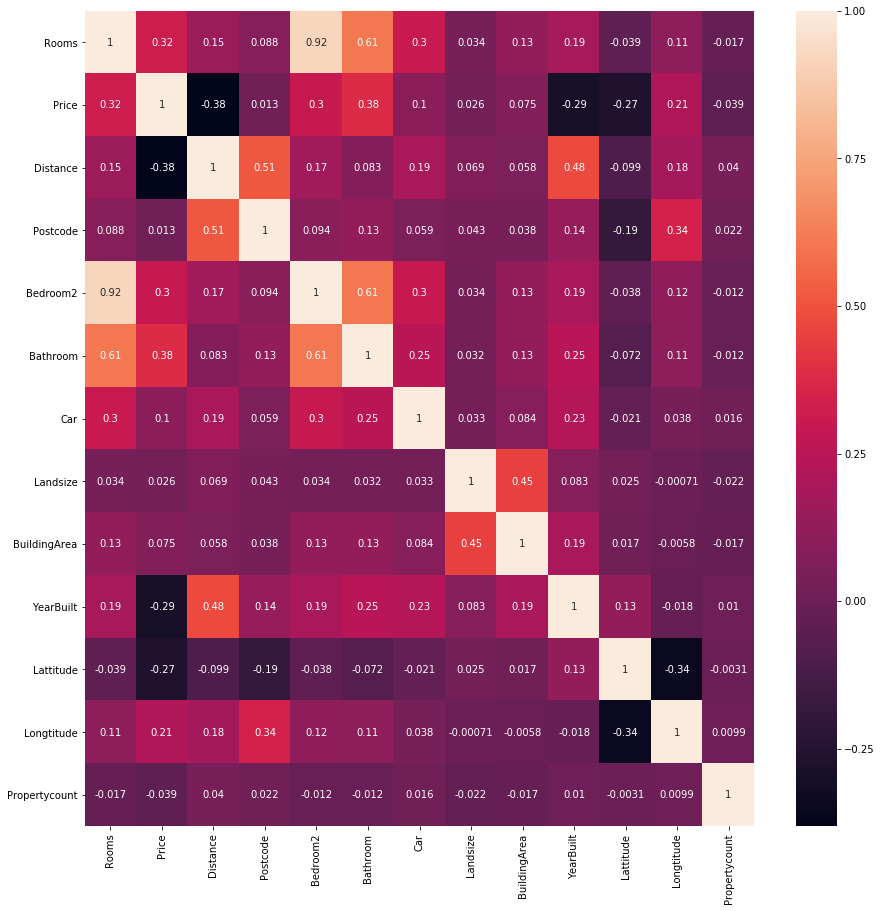

In [19]:
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(df[df["Type"] == "h"].corr(), annot=True)

In [20]:
from sklearn.cross_validation import train_test_split

C:\Users\HI\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
df_dr = df.dropna().sort_values("Date")

In [22]:
df_dr = df_dr

In [23]:
from datetime import date

In [24]:
all_Data = []

In [25]:
days_since_start = [(x - df_dr["Date"].min()).days for x in df_dr["Date"]]

In [26]:
suburb_dummies = pd.get_dummies(df_dr[["Type", "Method"]])

In [27]:
all_Data = df_dr.drop(["Address","Price","Date", "SellerG","Suburb","Type","Method","CouncilArea","Regionname"],axis=1).join(suburb_dummies)

In [28]:
X = all_Data

In [29]:
y = df_dr["Price"]

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

<h2> Linear Regression </h2>

In [31]:
from sklearn.linear_model import LinearRegression

In [32]:
lr = LinearRegression()

In [33]:
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
print(lr.intercept_)

-130921665.49497461


In [35]:
X.columns

Index(['Rooms', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'Lattitude', 'Longtitude',
       'Propertycount', 'Type_h', 'Type_t', 'Type_u', 'Method_PI', 'Method_S',
       'Method_SA', 'Method_SP', 'Method_VB'],
      dtype='object')

In [38]:
coeff_df = pd.DataFrame(lr.coef_,X.columns,columns=['Coefficient'])
ranked_suburbs = coeff_df.sort_values("Coefficient", ascending = False)
ranked_suburbs

,Coefficient
Longtitude,587.5k
Bathroom,205.3k
Type_h,154.4k
Rooms,100.1k
Car,59.1k
Method_SA,45.7k
Bedroom2,29.1k
Method_S,12.8k
Type_t,8.3k
BuildingArea,1.7k


In [39]:
predictions = lr.predict(X_test)

(200000, 1000000)

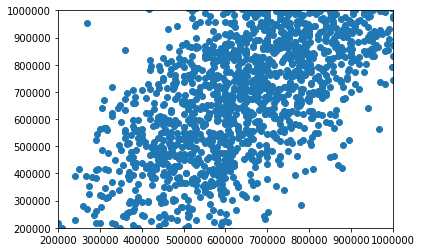

In [40]:
plt.scatter(y_test, predictions)
plt.ylim([200000,1000000])
plt.xlim([200000,1000000])

C:\Users\HI\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


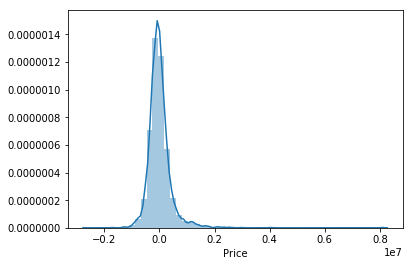

In [41]:
sns.distplot((y_test-predictions),bins=50)

In [42]:
from sklearn import metrics

In [43]:
print("MAE:", metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 267765.52027225995
MSE: 173525308869.0247
RMSE: 416563.69125143957
